In [1]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
from PIL import Image

In [2]:
TRAIN_DIR = r'F:\pe udemy\PROJECTS\face recognition\archive\images\train'
TEST_DIR = r'F:\pe udemy\PROJECTS\face recognition\archive\images\validation'

In [3]:
# constructs the full path of each image by joining the root directory, the class label subdirectory, and the image filename.
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)
print(train)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
                                                   image     label
0      F:\pe udemy\PROJECTS\face recognition\archive\...     angry
1      F:\pe udemy\PROJECTS\face recognition\archive\...     angry
2      F:\pe udemy\PROJECTS\face recognition\archive\...     angry
3      F:\pe udemy\PROJECTS\face recognition\archive\...     angry
4      F:\pe udemy\PROJECTS\face recognition\archive\...     angry
...                                                  ...       ...
28816  F:\pe udemy\PROJECTS\face recognition\archive\...  surprise
28817  F:\pe udemy\PROJECTS\face recognition\archive\...  surprise
28818  F:\pe udemy\PROJECTS\face recognition\archive\...  surprise
28819  F:\pe udemy\PROJECTS\face recognition\archive\...  surprise
28820  F:\pe udemy\PROJECTS\face recognition\archive\...  surprise

[28821 rows x 2 columns]


In [5]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)
print(test)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
                                                  image     label
0     F:\pe udemy\PROJECTS\face recognition\archive\...     angry
1     F:\pe udemy\PROJECTS\face recognition\archive\...     angry
2     F:\pe udemy\PROJECTS\face recognition\archive\...     angry
3     F:\pe udemy\PROJECTS\face recognition\archive\...     angry
4     F:\pe udemy\PROJECTS\face recognition\archive\...     angry
...                                                 ...       ...
7061  F:\pe udemy\PROJECTS\face recognition\archive\...  surprise
7062  F:\pe udemy\PROJECTS\face recognition\archive\...  surprise
7063  F:\pe udemy\PROJECTS\face recognition\archive\...  surprise
7064  F:\pe udemy\PROJECTS\face recognition\archive\...  surprise
7065  F:\pe udemy\PROJECTS\face recognition\archive\...  surprise

[7066 rows x 2 columns]


In [6]:
from tqdm.notebook import tqdm

In [7]:
import numpy as np
from tqdm.notebook import tqdm  # Importing tqdm for progress visualization
# from keras.preprocessing.image import load_img 
from tensorflow.keras.utils import load_img

In [8]:
def extract_features(images):
    features = []#This list will store the extracted features of the images.
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features



In [9]:
#EXTRACTION

In [10]:
train_features = extract_features(train['image'])
test_features = extract_features(test['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

F:\APPS\PANDAS\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


  0%|          | 0/7066 [00:00<?, ?it/s]

In [11]:
#NORMALIZATION

In [12]:
x_train = train_features / 255.0
x_test = test_features / 255.0

In [13]:
#RESULT

In [14]:
# # this code prepares the target labels for a classification task by
# first encoding them numerically using LabelEncoder, and then converting 
# them into one-hot encoded vectors using to_categorical from Keras. This
# ensures that the labels are in a suitable format for training a neural
# network model.

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(train['label'])#computes the numerical encoding for each unique label in the training set.

y_train = le.transform(train['label'])
y_test = le.transform(test['label'])
#perform one-hot encoding on the numerical labels


# One-hot encoding converts each numerical label into a binary vector where only one element is 1 (indicating the class) and all other elements are 0.
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

#Building the Neural Network Model

In [16]:
# sequential model
model = Sequential()

# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))#prevent overfitting

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# flattening
model.add(Flatten())

# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(7, activation='softmax'))

# model compilation
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [17]:
model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
226/226 [==============================] - 654s 3s/step - loss: 1.8225 - accuracy: 0.2452 - val_loss: 1.8085 - val_accuracy: 0.2624
Epoch 2/100
226/226 [==============================] - 670s 3s/step - loss: 1.7897 - accuracy: 0.2568 - val_loss: 1.7273 - val_accuracy: 0.2883
Epoch 3/100
226/226 [==============================] - 750s 3s/step - loss: 1.7001 - accuracy: 0.3067 - val_loss: 1.5727 - val_accuracy: 0.3753
Epoch 4/100
226/226 [==============================] - 674s 3s/step - loss: 1.5701 - accuracy: 0.3837 - val_loss: 1.4015 - val_accuracy: 0.4583
Epoch 5/100
226/226 [==============================] - 670s 3s/step - loss: 1.4789 - accuracy: 0.4254 - val_loss: 1.3604 - val_accuracy: 0.4731
Epoch 6/100
226/226 [==============================] - 699s 3s/step - loss: 1.4209 - accuracy: 0.4464 - val_loss: 1.3309 - val_accuracy: 0.4982
Epoch 7/100
226/226 [==============================] - 621s 3s/step - loss: 1.3853 - accuracy: 0.4674 - val_loss: 1.2692 - val_accuracy:

226/226 [==============================] - 538s 2s/step - loss: 0.9021 - accuracy: 0.6621 - val_loss: 1.0321 - val_accuracy: 0.6233
Epoch 58/100
226/226 [==============================] - 580s 3s/step - loss: 0.9029 - accuracy: 0.6635 - val_loss: 1.0329 - val_accuracy: 0.6199
Epoch 59/100
226/226 [==============================] - 723s 3s/step - loss: 0.8977 - accuracy: 0.6649 - val_loss: 1.0289 - val_accuracy: 0.6247
Epoch 60/100
226/226 [==============================] - 662s 3s/step - loss: 0.8856 - accuracy: 0.6690 - val_loss: 1.0252 - val_accuracy: 0.6251
Epoch 61/100
226/226 [==============================] - 672s 3s/step - loss: 0.8862 - accuracy: 0.6709 - val_loss: 1.0338 - val_accuracy: 0.6254
Epoch 62/100
226/226 [==============================] - 668s 3s/step - loss: 0.8824 - accuracy: 0.6699 - val_loss: 1.0220 - val_accuracy: 0.6275
Epoch 63/100
226/226 [==============================] - 677s 3s/step - loss: 0.8767 - accuracy: 0.6770 - val_loss: 1.0371 - val_accuracy: 0.621

###### 

In [18]:
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [19]:
from keras.models import model_from_json
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [31]:
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def ef(image):
    img = load_img(image, grayscale=True)
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)#4D array 
    return feature / 255.0

#first dimension represents the number of samples 
#the second and third dimensions represent the height and width of the image
#ourth dimension represents the number of channels

In [23]:
image = 'a.jpg'
print("original image is of sad")
img = ef(image)#Preprocessing the Image:
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of sad
1/1 [==============================] - 0s 306ms/step
model prediction is  sad


In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 [==============================] - 0s 54ms/step
model prediction is  sad


F:\APPS\PANDAS\lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


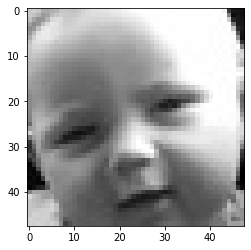

In [26]:
image = 'a.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')

# Determines the predicted emotion label by finding the index of the maximum predicted value in the pred array 

original image is of fear
1/1 [==============================] - 0s 57ms/step
model prediction is  sad


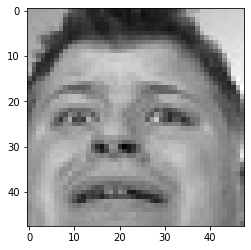

In [27]:
image = 'b.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [30]:
import cv2
from keras.models import model_from_json
import numpy as np

# Load the pre-trained model architecture from JSON file
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)

# Load the pre-trained model weights
model.load_weights("emotiondetector.h5")

# Load the Haar cascade classifier for face detection
haar_file = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_file)

# Define a function to extract features from an image
def extract_features(image):
    feature = np.array(image)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

# Open the webcam (camera)
webcam = cv2.VideoCapture(0)

# Define labels for emotion classes
labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}

while True:
    # Read a frame from the webcam
    i, im = webcam.read()

    # Convert the frame to grayscale
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = face_cascade.detectMultiScale(im, 1.3, 5)

    try:
        # For each detected face, perform facial emotion recognition
        for (p, q, r, s) in faces:
            # Extract the region of interest (ROI) which contains the face
            image = gray[q:q + s, p:p + r]

            # Draw a rectangle around the detected face
            cv2.rectangle(im, (p, q), (p + r, q + s), (255, 0, 0), 2)#The rectangle is drawn with a blue color (255, 0, 0) and a thickness of 2 pixels.

            # Resize the face image to the required input size (48x48)
            image = cv2.resize(image, (48, 48))

            # Extract features from the resized face image
            img = extract_features(image)

            # Make a prediction using the trained model
            pred = model.predict(img)

            # Get the predicted label for emotion
            prediction_label = labels[pred.argmax()]

            # Display the predicted emotion label near the detected face
            cv2.putText(im, f'Emotion: {prediction_label}', (p - 10, q - 10),
                        cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (0, 0, 255))#The text is displayed using the FONT_HERSHEY_COMPLEX_SMALL font with a size of 2 and a red color (0, 0, 255).

        # Display the frame with annotations in real-time
        cv2.imshow("Real-time Facial Emotion Recognition", im)

        # Break the loop if the 'Esc' key is pressed
        if cv2.waitKey(1) == 27:
            break

    except cv2.error:
        pass

# Release the webcam and close all OpenCV windows
webcam.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 51ms/step


KeyboardInterrupt: 